## Prediction of House Prices in the US

Data obtained from real estate markets provides an opportunity for data analysts to analyze and forecast where property prices are heading towards. Prediction of property prices are becoming increasingly essential and beneficial. Property prices say so much about the overall market condition and the economic health of a country.

For this project, we will be wrangling a large dataset that contains property sales records in the USA to gain insights and build a reliable predictor model that can estimate the house prices efficiently. These information is useful for parties like customers who are looking to purchase a new property, real estate agents and even banks who sanction loans.

Importing required libraries

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Make numpy values easier to read.
np.set_printoptions(precision=4, suppress=True)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# **Business Understanding**


### **Problem Statement**

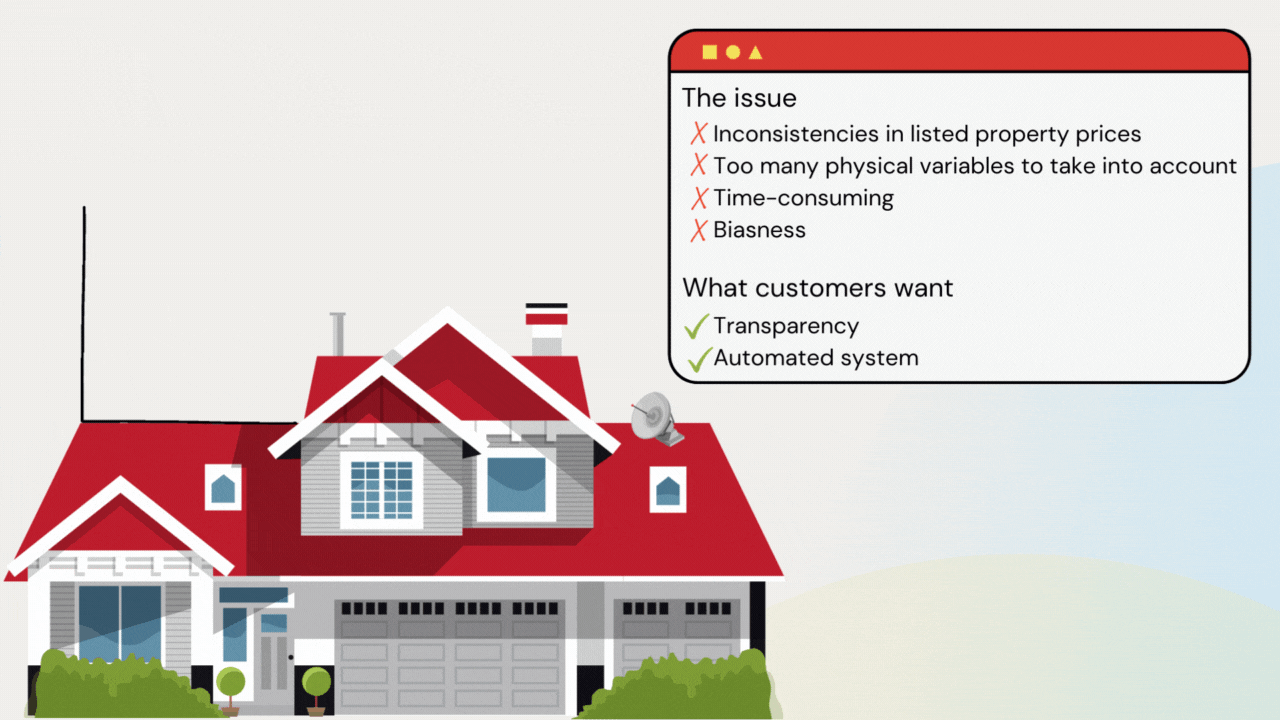


Housing price trend shows constant rise or sudden drop over the years depending on the state of the economy. To forecast a house price, people usually make a comparison with properties in similar neighborhoods. Many also utilize various websites displaying the market price of the properties. However, different websites may show different prices, making it difficult for house buyers to decide. There are also many variables that go into house pricing such as the number of bedrooms, the number of bathrooms, the square footage, the view from the house, or even its condition. Considering all these variables to make price prediction will be tedious, time-consuming and may cause biasness. This project aims to utilize machine learning for house price prediction. Multiple machine learning models are tested on the dataset containing property sales records in the USA. The performance of each model is measured by the four parameters of accuracy, precision, specificity, and sensitivity. Proper evaluations of house pricing can bring transparency for the customers as they are able to justify the prices, backed by available data. Real estate can also benefit by having access to an automated price estimation system to help them list houses at competitive market value.

###Business objective
To construct a successful price prediction model for the listed properties. This information can also be used in marketing that can attract more customers due to data transparency and competitive price.

###Data mining goals
Develop house price prediction model based on existing property sales records using machine learning, given their square footage, price, number of bedrooms, condition etc. We also want to increase accuracy in price prediction model of the listed properties.


###Project Plan

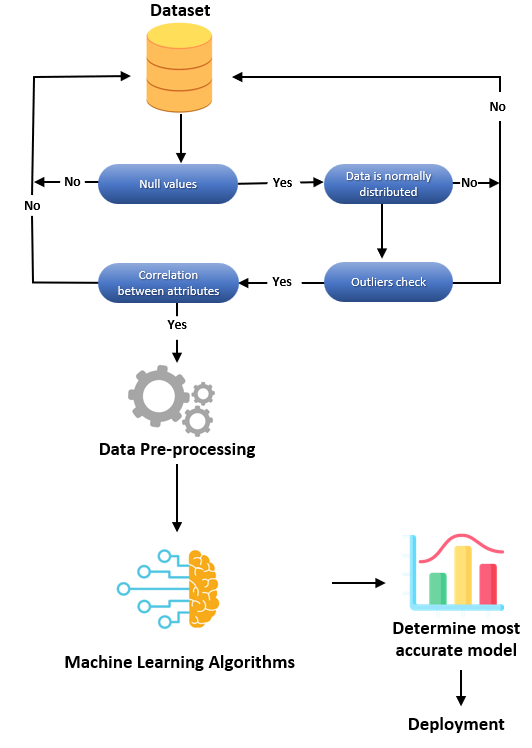

# **Data Understanding**

###Data Collection

For this project, the data we use is taken from [House price prediction dataset](https://www.kaggle.com/datasets/shree1992/housedata) in Kaggle.

In [ ]:
#importing Dataset
data = pd.read_csv("..//content/data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


###EDA

In [ ]:
data.shape

(4600, 18)

The dataset contains:
*   4600 rows of data
*   18 different columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Below are the definition for each column attributes:

* `date` - When the sales recorded
* `price` -  House price in USD
* `bedrooms` - Number of bedrooms in the house
* `bathrooms` - Number of bathrooms in the house
* `sqft_living` - Total area of living space
* `sqft_lot` - Total area of the lot
* `floors` - Number of floors
* `waterfront` - 0 if not in sea/lake/river area, 1 if located near to sea/lake/river
* `view` - View rating of '0 to 4' where 0 is lowest and 4 is highest
* `condition` - House condition rating of '1 to 5' where 1 is in bad shape and 5 is best condition
* `sqft_above` - Total of living area above ground
* `sqft_basement` - Total living area underground
* `yr_built` - Year the house was built
* `yr_renovated` - Year the house was recently renovated
* `street` - House Address
* `city` - City
* `statezip` - State ZIP
* `country` - Country

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
date,70
price,1741
bedrooms,10
bathrooms,26
sqft_living,566
sqft_lot,3113
floors,6
waterfront,2
view,5
condition,5


In [ ]:
#check missing data
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

From here we can see that there are no NaN values in this dataset

**Histogram of Bedrooms**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


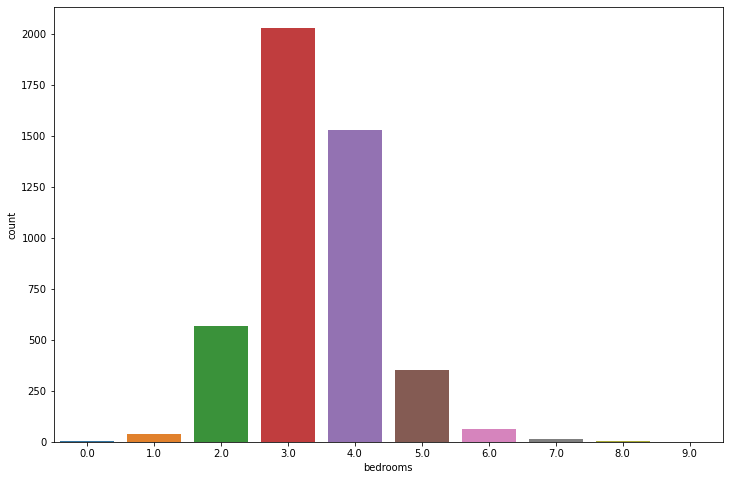

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data.bedrooms)

Majority of the houses listed has 3 or 4 Bedrooms.

**Histogram of Bathrooms**

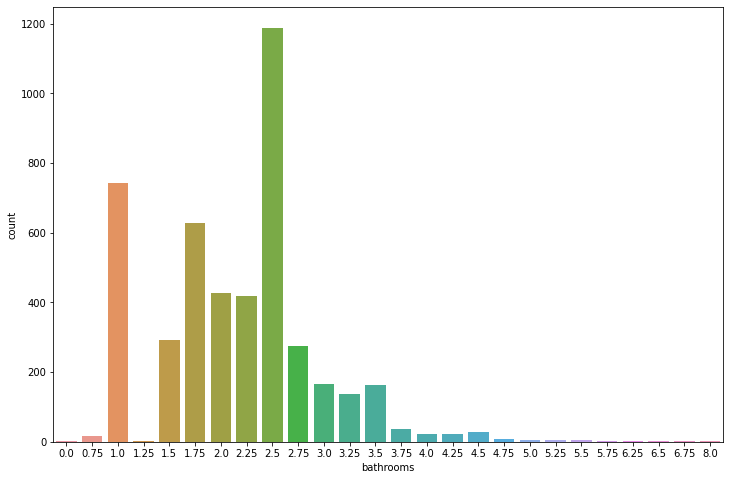

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=data['bathrooms'])

**Square Footage**

In [ ]:
sqft_cols = data.columns[data.columns.str.contains('sqft')]
sqft_cols

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], dtype='object')

In [ ]:
def show_count_plots(data, cols):
    fig = plt.figure(figsize=(12, 12))
    grid = GridSpec(ncols=2,
                    nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(data[name], kde=True, ax=ax)

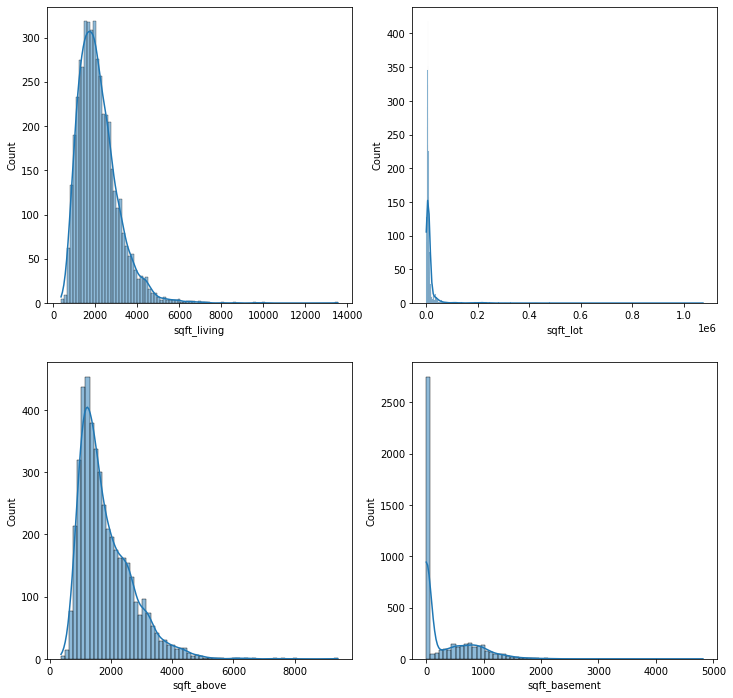

In [ ]:
show_count_plots(data, sqft_cols)

Majority of the houses does not have a basement or little to no extra lot space

**Number of Floors**

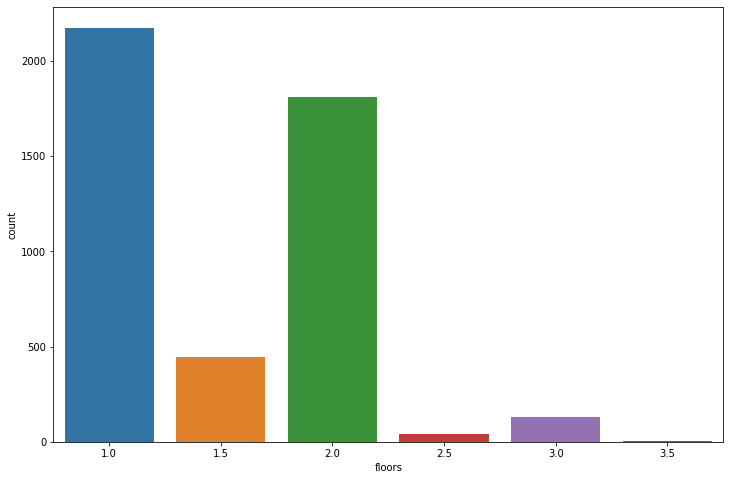

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=data['floors'])

**Years Built and Renovated**

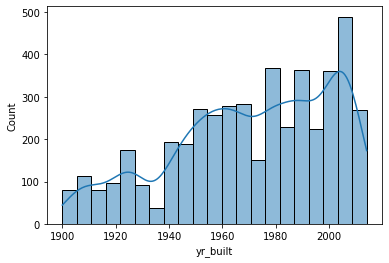

In [ ]:
sns.histplot(data.yr_built, kde=True)

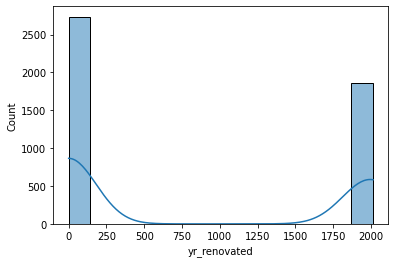

In [ ]:
sns.histplot(data.yr_renovated, kde=True)

More than half of the houses are not renovated. For the purpose of next graph, houses that have been renovated are set to 1 and those that are not renovated are set to 0.

In [ ]:
data.yr_renovated = data.yr_renovated.apply(lambda x: 0 if x==0 else 1)

0    2735
1    1865
Name: yr_renovated, dtype: int64


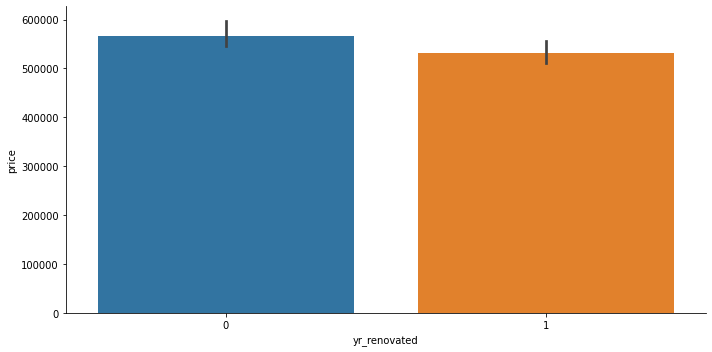

In [ ]:
print(data.yr_renovated.value_counts())
sns.catplot(x='yr_renovated', y='price', data=data,
            kind='bar', height=5, aspect=2)

**Location Information**

In [ ]:
data.city.value_counts().head(10)

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

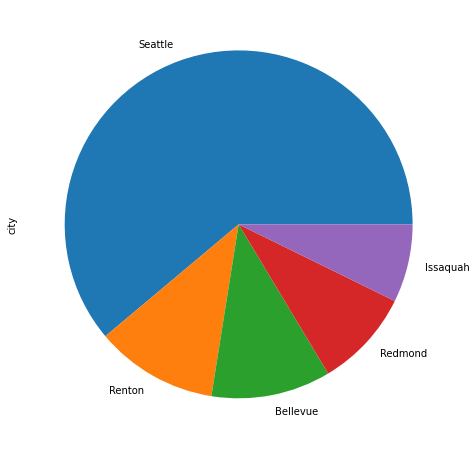

In [ ]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
data.city.value_counts().head(5).plot.pie()

**Correlation between Attributes**

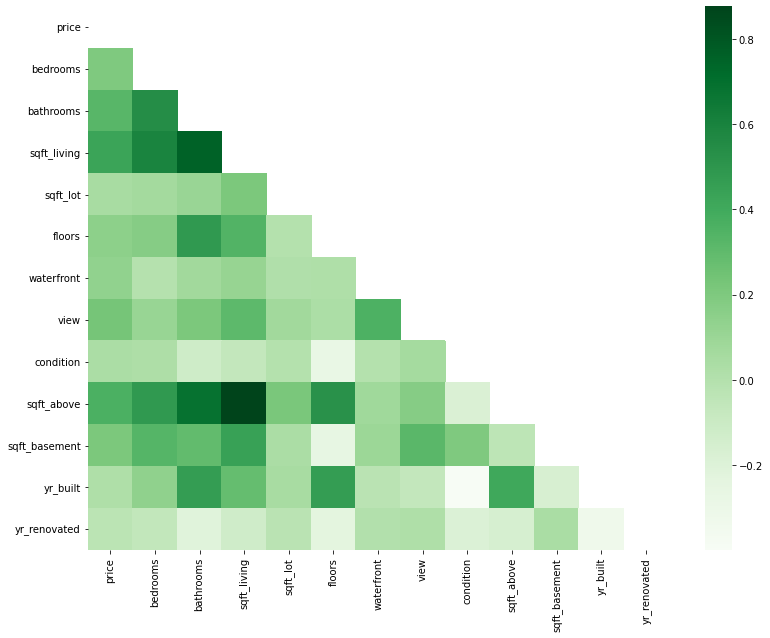

In [ ]:
plt.figure(figsize=(13, 10))
corr_data = data.drop(['date'], axis=1)

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask, cmap='Greens')
h_map


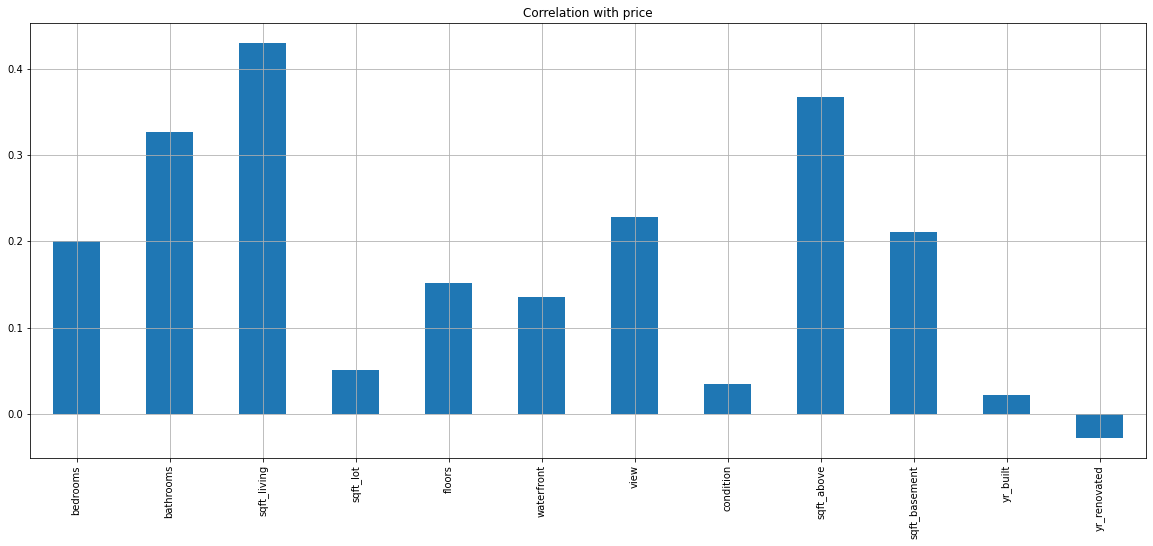

In [ ]:
data.drop(['price'], axis=1).corrwith(data.price).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with price");

# **Data Preparation**


In [ ]:
# Check duplicate rows
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool

The dataset has no redundant records.

PRICE STATISTICS :  count       4600.00
mean      551962.99
std       563834.70
min            0.00
25%       322875.00
50%       460943.46
75%       654962.50
max     26590000.00
Name: price, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


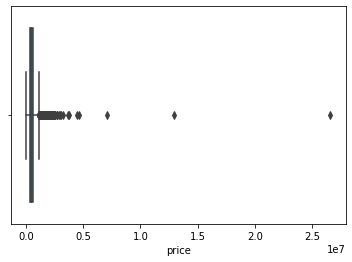

In [ ]:
# Deal with outliers
pd.options.display.float_format = '{:.2f}'.format
print('PRICE STATISTICS : ', data['price'].describe())
sns.boxplot(data['price'])
plt.show()

Some outliers are present in the target data.

In [ ]:
print('PRICE > 10.0M : ', data[data['price'] > 10000000])

PRICE > 10.0M :                       date       price  bedrooms  bathrooms  sqft_living  \
4346  2014-06-23 00:00:00 12899000.00      3.00       2.50         2190   
4350  2014-07-03 00:00:00 26590000.00      3.00       2.00         1180   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4346     11394    1.00           0     0          3        1550   
4350      7793    1.00           0     0          4        1180   

      sqft_basement  yr_built  yr_renovated             street     city  \
4346            640      1956             1    5426 40th Ave W  Seattle   
4350              0      1992             0  12005 SE 219th Ct     Kent   

      statezip country  
4346  WA 98199     USA  
4350  WA 98031     USA  


From inspection, the high price seems to correspond to buildings with a lot of lot area.

In [ ]:
print('PRICE = 0 : ', data[data['price'] == 0].shape)

PRICE = 0 :  (49, 18)


There are 49 rows with their price set to 0. The price for these rows will be replaced with the mean price.

In [ ]:
data['price'].replace(0, np.nan, inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)

In [ ]:
data.head

<bound method NDFrame.head of                      date      price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  313000.00      3.00       1.50         1340   
1     2014-05-02 00:00:00 2384000.00      5.00       2.50         3650   
2     2014-05-02 00:00:00  342000.00      3.00       2.00         1930   
3     2014-05-02 00:00:00  420000.00      3.00       2.25         2000   
4     2014-05-02 00:00:00  550000.00      4.00       2.50         1940   
...                   ...        ...       ...        ...          ...   
4595  2014-07-09 00:00:00  308166.67      3.00       1.75         1510   
4596  2014-07-09 00:00:00  534333.33      3.00       2.50         1460   
4597  2014-07-09 00:00:00  416904.17      3.00       2.50         3010   
4598  2014-07-10 00:00:00  203400.00      4.00       2.00         2090   
4599  2014-07-10 00:00:00  220600.00      3.00       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912

In [ ]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
data['city'].nunique()

44

In [ ]:
city_list = pd.unique(data['city'])
city_list

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [ ]:
# encoding city as categorical variables into numerical values
data['city']=data['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

In [ ]:
data.head

<bound method NDFrame.head of                      date      price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  313000.00      3.00       1.50         1340   
1     2014-05-02 00:00:00 2384000.00      5.00       2.50         3650   
2     2014-05-02 00:00:00  342000.00      3.00       2.00         1930   
3     2014-05-02 00:00:00  420000.00      3.00       2.25         2000   
4     2014-05-02 00:00:00  550000.00      4.00       2.50         1940   
...                   ...        ...       ...        ...          ...   
4595  2014-07-09 00:00:00  308166.67      3.00       1.75         1510   
4596  2014-07-09 00:00:00  534333.33      3.00       2.50         1460   
4597  2014-07-09 00:00:00  416904.17      3.00       2.50         3010   
4598  2014-07-10 00:00:00  203400.00      4.00       2.00         2090   
4599  2014-07-10 00:00:00  220600.00      3.00       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912

In [ ]:
#Pearson Feature Selection
corr_data = data.drop(['date', 'city'], axis=1)
cor = corr_data.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
pearson_features = cor_target[cor_target>0.1]
pearson_features

price           1.00
bedrooms        0.21
bathrooms       0.34
sqft_living     0.44
floors          0.15
waterfront      0.14
view            0.24
sqft_above      0.38
sqft_basement   0.22
Name: price, dtype: float64

In [ ]:
X = data.drop("price", axis=1)  # independent columns
y = data.iloc[:,1] # target column i.e price range
y = y.astype("int")

In [ ]:
data = data.drop(['country', 'statezip','street', 'date'], axis= 1)

In [ ]:
data['price'].replace(0, np.nan, inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)

In [ ]:
#no feature selection #better
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'city']
num_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above', 'sqft_above', 'yr_built', 'yr_renovated']
bin_cols = ['waterfront']

# columns for pearson feature selection
#cat_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'city']
#num_cols = ['sqft_living', 'sqft_basement', 'sqft_above', 'sqft_above']

In [ ]:
x = data.drop("price", axis=1)
y = data['price']

In [ ]:
#scaler = MinMaxScaler()
scaler = StandardScaler() # better
#scaler = MaxAbsScaler()
X=x.copy()
X[num_cols] = scaler.fit_transform(X[num_cols])
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.00,1.50,-0.83,-0.19,1.50,0,0,3,-0.57,-0.67,-0.53,1.21,0
1,5.00,2.50,1.57,-0.16,2.00,0,4,5,1.79,-0.07,-1.67,-0.83,1
2,3.00,2.00,-0.22,-0.08,1.00,0,0,4,0.12,-0.67,-0.16,-0.83,2
3,3.00,2.25,-0.14,-0.19,1.00,0,0,4,-0.96,1.48,-0.26,-0.83,3
4,4.00,2.50,-0.21,-0.12,1.00,0,0,4,-0.80,1.05,0.18,1.21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.00,1.75,-0.65,-0.24,1.00,0,0,4,-0.37,-0.67,-0.56,1.21,1
4596,3.00,2.50,-0.71,-0.20,2.00,0,0,3,-0.43,-0.67,0.41,1.21,3
4597,3.00,2.50,0.90,-0.22,2.00,0,0,3,1.37,-0.67,1.29,-0.83,18
4598,4.00,2.00,-0.05,-0.23,1.00,0,0,3,-0.88,1.53,0.11,-0.83,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
X[encoded_cols] = encoder.transform(X[cat_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
XN = X[num_cols + encoded_cols + bin_cols]

XN.columns.duplicated()
XN = XN.T.drop_duplicates().T

# **Modelling**

1. Split the dataset for test (10%) and training (90%)

2. 	Input the training data into machine learning algorithms

3. 	Calculate:
- **R-Squared Error (MSE)** \
High R-squared value indicates that the better the model fits the data
- **Root Mean Square Error (RMSE)** \
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. (√Mean Squared Error)

## Data split into test (10%) and training (90%)

In [ ]:
x = XN

In [ ]:
x.head(2)

,sqft_living,sqft_lot,sqft_basement,sqft_above,yr_built,yr_renovated,bedrooms_0.0,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,...,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,waterfront
0,-0.83,-0.19,-0.67,-0.57,-0.53,1.21,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.57,-0.16,-0.07,1.79,-1.67,-0.83,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
y.head()

0    313000.00
1   2384000.00
2    342000.00
3    420000.00
4    550000.00
Name: price, dtype: float64

Split the dataset for test (20%) and training (80%)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40 )

## Machine Learning Models

In [ ]:
models = [LinearRegression(),
          SGDRegressor(),
          BayesianRidge(),
          Ridge(),
          ElasticNet(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          KNeighborsRegressor(),
          XGBRegressor()
          ]

names = ['LinearRegression',
         'SGDRegressor',
         'BayesianRidge',
         'Ridge',
         'ElasticNet',
         'RandomForestRegressor',
         'GradientBoostingRegressor',
         'KNeighborsRegressor',
         'XGBRegressor']

R2_score = []
RMSE_score = []

for name in models:
    model = name
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)

    r2_accuracy_score = r2_score(y_test, model_pred)
    large_error_score = np.sqrt(metrics.mean_squared_error(y_test, model_pred))

    R2_score.append(r2_accuracy_score)
    RMSE_score.append(large_error_score)

[14:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
evaluation = pd.DataFrame({'Models': names,
                           'R_Squared': R2_score,
                           'RMSE': RMSE_score})

evaluation

,Models,R_Squared,RMSE
0,LinearRegression,0.63,287987.00
1,SGDRegressor,0.61,298775.02
2,BayesianRidge,0.61,296631.15
3,Ridge,0.64,285768.65
4,ElasticNet,0.46,349323.45
5,RandomForestRegressor,0.55,319026.32
6,GradientBoostingRegressor,0.57,310946.60
7,KNeighborsRegressor,0.49,338953.21
8,XGBRegressor,0.53,325558.16


# Evaluating and Intepretation


## Evaluating the results

## R squared score

In [ ]:
evaluation.sort_values(by="R_Squared",ascending=False)

,Models,R_Squared,RMSE
3,Ridge,0.64,285768.65
0,LinearRegression,0.63,287987.00
2,BayesianRidge,0.61,296631.15
1,SGDRegressor,0.61,298775.02
6,GradientBoostingRegressor,0.57,310946.60
5,RandomForestRegressor,0.55,319026.32
8,XGBRegressor,0.53,325558.16
7,KNeighborsRegressor,0.49,338953.21
4,ElasticNet,0.46,349323.45


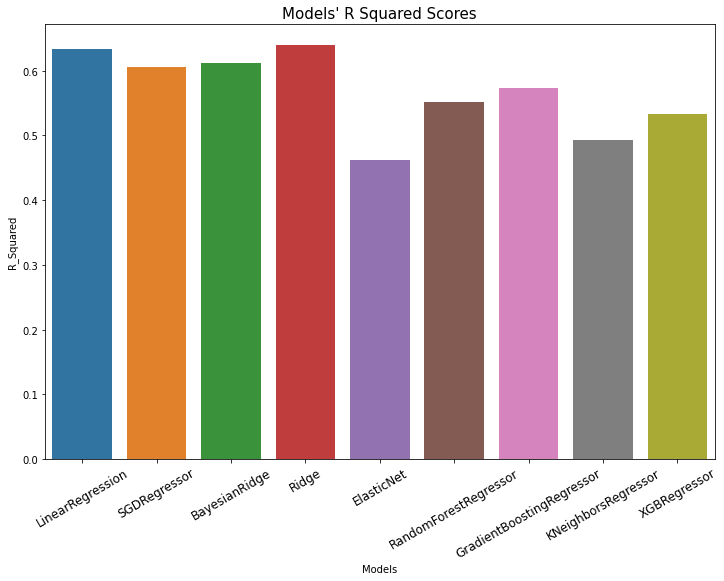

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = evaluation["Models"], y = evaluation["R_Squared"])
plt.title("Models' R Squared Scores", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

### Best R squared score

In [ ]:
# Best R2
evaluation[evaluation["R_Squared"]==evaluation["R_Squared"].max()]

,Models,R_Squared,RMSE
3,Ridge,0.64,285768.65


## RMSE score

In [ ]:
evaluation.sort_values(by="RMSE",ascending=True)

,Models,R_Squared,RMSE
3,Ridge,0.64,285768.65
0,LinearRegression,0.63,287987.00
2,BayesianRidge,0.61,296631.15
1,SGDRegressor,0.61,298775.02
6,GradientBoostingRegressor,0.57,310946.60
5,RandomForestRegressor,0.55,319026.32
8,XGBRegressor,0.53,325558.16
7,KNeighborsRegressor,0.49,338953.21
4,ElasticNet,0.46,349323.45


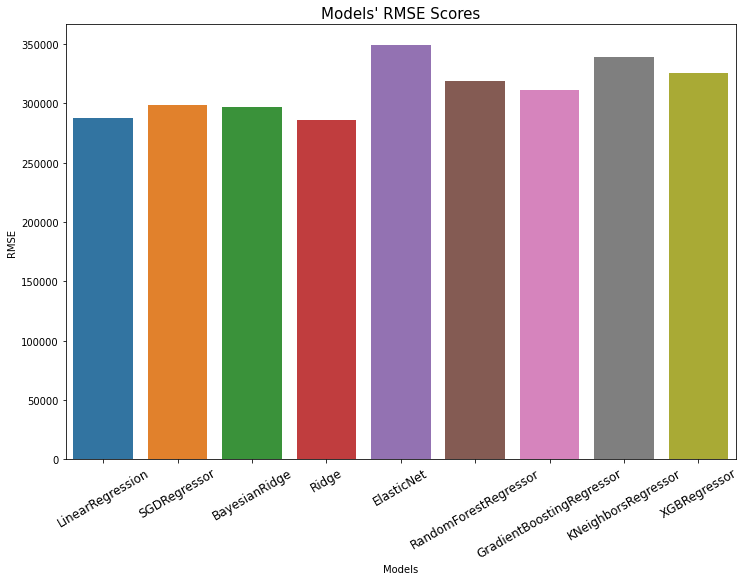

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = evaluation["Models"], y = evaluation["RMSE"])
plt.title("Models' RMSE Scores", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

### Best RMSE score

In [ ]:
# Best RMSE
evaluation[evaluation["RMSE"]==evaluation["RMSE"].min()]

,Models,R_Squared,RMSE
3,Ridge,0.64,285768.65


The results shows the r-squared value and rmse value for across all model used in this project. From the results, Ridge model achieved highest r-squared value and lowest RMSE value. The Ridge model will be tuned to achived its maximum potential for r-squared value.

## Hyperparameter tuning

In [ ]:
ridge_params = {
    'alpha':[0.9,1,1.1]
    }

ridge_reg = Ridge()

ridge_reg_tuned = GridSearchCV(estimator=ridge_reg, param_grid = ridge_params)

ridge_reg_tuned.fit(x_train, y_train)
ridge_reg_tuned.best_estimator_

Ridge(alpha=1.1)

In [ ]:
model = Ridge(alpha=1.1)
model.fit(x_train,y_train)
model_pred = model.predict(x_test)
r2_accuracy_score = r2_score(y_test, model_pred)
r2_accuracy_score

0.6398469439099312

## Predicted values vs true values intrepertation

### Scatter plot

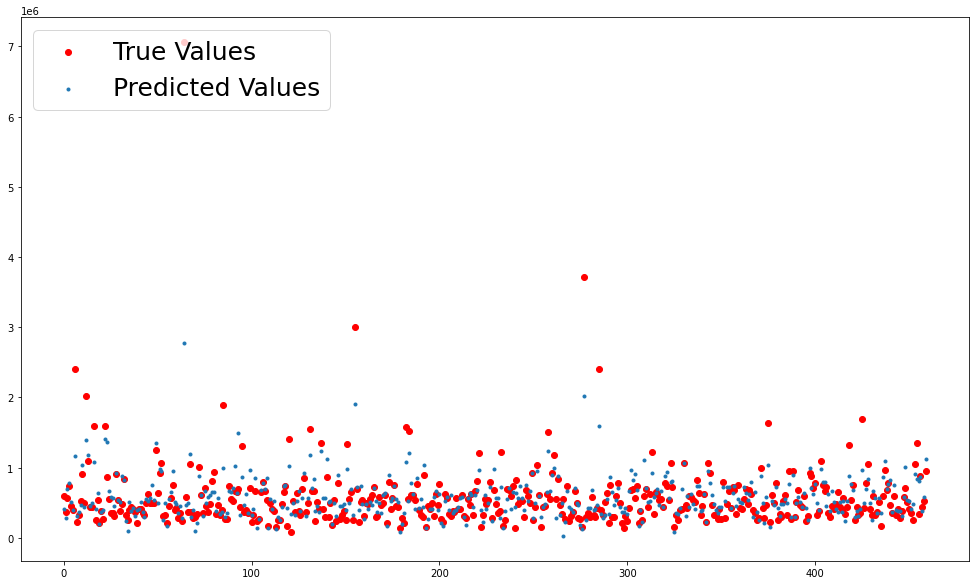

In [ ]:
fig = plt.figure(figsize=(17, 10))

#data_plot = data.sort_values(by=['price'])
#x_plot = data_plot.drop('price', axis=1)
#y_plot = data_plot.price.astype(int)
x_plot = x_test
y_plot = y_test
plt.scatter(range(x_plot.shape[0]), y_plot, color='red', label='True Values')
plt.scatter(range(x_plot.shape[0]), model_pred, marker='.', label='Predicted Values')

plt.legend(loc=2, prop={'size': 25})

### Line Plot

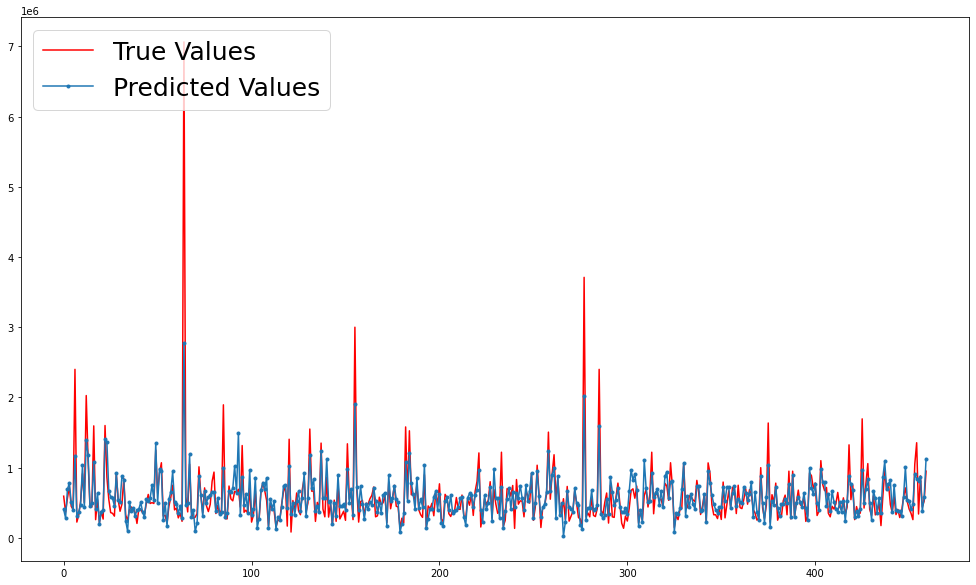

In [ ]:
fig = plt.figure(figsize=(17, 10))

#data_plot = data.sort_values(by=['price'])
#x_plot = data_plot.drop('price', axis=1)
#y_plot = data_plot.price.astype(int)
x_plot = x_test
y_plot = y_test
plt.plot(range(x_plot.shape[0]), y_plot, color='red', label='True Values')
plt.plot(range(x_plot.shape[0]), model_pred, marker='.', label='Predicted Values')

plt.legend(loc=2, prop={'size': 25})

### How close predicted values to the true values

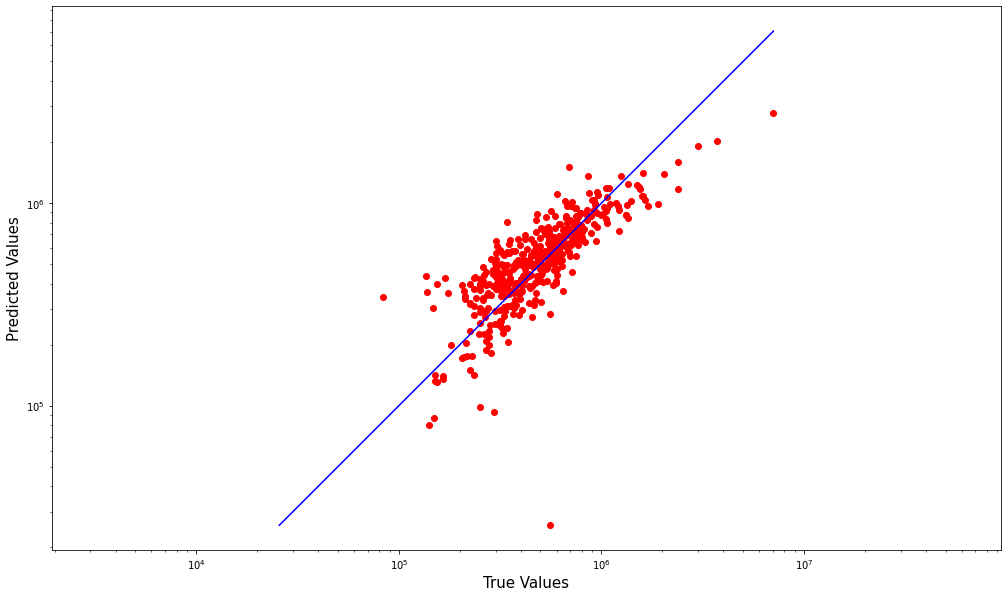

In [ ]:
fig = plt.figure(figsize=(17, 10))
plt.scatter(y_plot, model_pred, c='red')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(model_pred), max(y_plot))
p2 = min(min(model_pred), min(y_plot))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

### Absolute errors of predicted values and true value

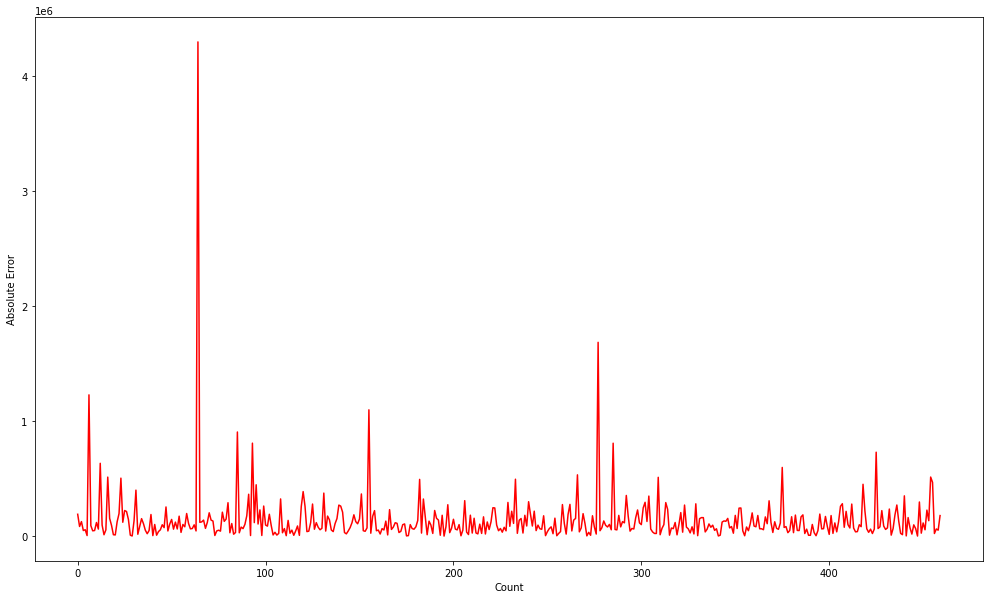

In [ ]:
fig = plt.figure(figsize=(17, 10))
error_plot = abs(model_pred - y_plot)
plt.plot(range(x_plot.shape[0]), error_plot, color='red', label='Errors')
plt.ylabel("Absolute Error")
plt.xlabel("Count")
plt.show()

The plots shows the difference between actual and predicted house price (absolute error). The plot shows, the model good enough to give correct and close price prediction since the absolute error between actual and predicted house price is relative small as shown in the plot where blue line and red line have almost similar pattern and point. However, some of the value may not be predicted accurately since as shown in the plot where the peaks of the plot have high difference between actual and predicted. This may due to the outliers in the data.